# Exercise 2

In [45]:
import sys
sys.path.append("C:\\Users\\callu\\.mlrefined")
datapath = "C:\\Users\\callu\\.mlrefined\\mlrefined_datasets\\superlearn_datasets\\"

import tensorflow as tf
from autograd import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

from mlrefined_libraries import unsupervised_library as unsuplib
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('IMPORTED')

IMPORTED


In [46]:
train_labels.shape=(1,60000)
test_labels.shape=(1,10000)
train_images=(train_images.reshape(60000,784)).T
test_images=(test_images.reshape(10000,784)).T
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_images.dtype)
print(train_labels.dtype)


(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)
uint8
uint8


In [47]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y):
    # get subset of points
    x_p = x
    y_p = y

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

## 2.1)
Implement (in python) a version of mini-batch gradient descent that takes a batch-size as
input def gradient descent(g,w,x train,y train,alpha,max its,batch size): For a
given batch-size it should determine how many number of batches (num batch) is needed for
a full ephoch, then construct a batch by sequentially going through the samples in num batch
steps each time using a batch size group of samples. Decide what to do if the batch size
is not a divisor of the number of samples. For each of the max its number of epochs perform
num batch gradient steps. You should record the cost-history at each epoch. You can implement
all this by modifying previous versions of gradient descent.

If you’re ambitious, you can make things run faster by flattening g. As explained at the
end of appendix B.10 in Watt et al you can use g flat, unflatten, w = flatten func(g,
w). You then have to be careful by using g flat instead of g.

In [48]:
from autograd.misc.flatten import flatten_func
from autograd import grad 

# minibatch gradient descent
def mini_batch_GD(g,w,x_train,y_train,alpha,max_its,batch_size):
    #Compute gradient module using autograd
    gradient = grad(g)
    weight_history = [w]    
    cost_history = [g(w,x_train,y_train)]
    
    #max_its == number of epochs
    #if have R, flag to train images/num batches !=0 
    #want to only append 
    
    epoch = np.size(y_train)
    
    
    if epoch%batch_size >= 1:
        #if epoch is not divisible by batch size creates a semi batch size which we can evaluate as the last batch
        num_batches = int((epoch/batch_size) + 1)
        semi_batch_size = epoch%batch_size
        
    else:
        #if epoch is divisible by batch size assigns semi batch size to batch size so to be evaluated as the last batch
        num_batches = int(epoch/batch_size)
        semi_batch_size = batch_size
    
    for i in range (max_its):
        for k in range (num_batches):
            if (k == num_batches):
                #evaluate the last batches indexes to the semi batch sise 
                x_ind = x_train[: ,(k)*semi_batch_size: (k + 1)*semi_batch_size]
                y_ind = y_train[: ,(k)*semi_batch_size: (k + 1)*semi_batch_size]

                grad_eval = gradient(w,x_ind,y_ind)
                w = w - alpha*grad_eval
                
            else:
                #evaluate the other batches indexes to the regular batch size
                x_ind = x_train[: ,(k)*batch_size: (k + 1)*batch_size]
                y_ind = y_train[: ,(k)*batch_size: (k + 1)*batch_size]

                grad_eval = gradient(w,x_ind,y_ind)
                w = w - alpha*grad_eval
        
        cost_eval = g(w,x_ind,y_ind)
        
        weight_history.append(w)
        cost_history.append(cost_eval)
        
    return weight_history,cost_history

## 2.2)
Use your mini-batch gradient descent with a number of epochs, max its=5, and a random
starting vector w = 0.1*np.random.randn(N+1,C) where N,C have their usual definition. Use
a learning rate of α = 0.001. Make 2 separate runs, first with a batchsize of 200 then with a
batchsize that is equal to the number of samples (so called full batch). Plot the cost histories
versus the number of epochs. Which batchsize performs the best ?
      

In [49]:
max_its = 5
N = 784
C = 10
w = 0.1*np.random.randn(N+1,C)
alpha = 0.001
batch1 = 200
full_batch = 60000

#batch2 = 10067

g = multiclass_perceptron

from autograd. misc. flatten import flatten_func
g_flat, unflatten_func, w_flat = flatten_func(g, w)

batch1_w_history, batch1_cost_history = mini_batch_GD(g_flat,w_flat,train_images,train_labels,alpha,max_its,batch1)

batch2_w_history, batch2_cost_history = mini_batch_GD(g_flat,w_flat,train_images,train_labels,alpha,max_its,full_batch)

#batch3_w_history, batch3_cost_history = mini_batch_GD(g_flat,w_flat,train_images,train_labels,alpha,max_its,batch2)

print('DONE')

DONE


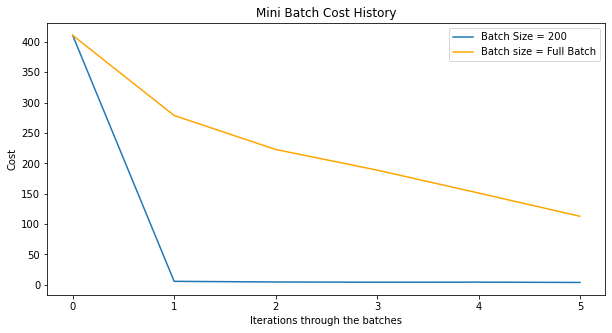

The final cost history for a batch size of 200 is: [3.93222801]
The final cost history for a full batch size: [112.88292572]


In [50]:
num_its = np.arange(0,np.size(batch1_cost_history))

plt.figure(figsize = (10,5))
plt.plot(num_its,batch1_cost_history)
plt.plot(num_its,batch2_cost_history, color = 'orange')
#plt.plot(num_its,batch3_cost_history)
plt.title('Mini Batch Cost History')
plt.legend(['Batch Size = 200','Batch size = Full Batch'])
plt.ylabel('Cost')
plt.xlabel('Iterations through the batches')
plt.show()

print('The final cost history for a batch size of 200 is:', batch1_cost_history[-1])
print('The final cost history for a full batch size:', batch2_cost_history[-1])


## 2.3)
Use the best set of weights you obtained to make a histogram of the percentage of misclassified samples as a function of the digit (0 . . . 9). Is there a digit that is more often misclassified?

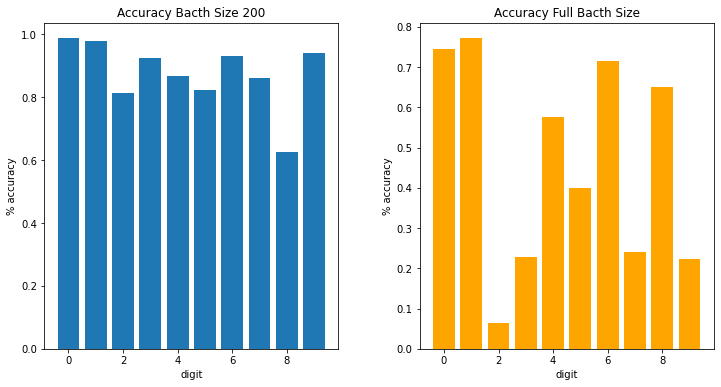

In [51]:
flat_w_batch1 = unflatten_func(batch1_w_history[-1])
flat_w_full_batch = unflatten_func(batch2_w_history[-1])


accuracy_batch1 = []
accuracy_full_batch = []

for i in range(10):
    index = np.argwhere(test_labels == i)[:,1]
    total_num = np.size(index)
    
    x_test_index = test_images.T[index]
    model_test1 = model(x_test_index.T, flat_w_batch1)
    max_ident = np.argmax(model_test1, axis=0)
    miss = np.argwhere(max_ident != i)[:]
    num_miss = np.size(miss)
    
    accuracy_batch1.append((total_num-num_miss)/total_num)
    
    model_test_full = model(x_test_index.T, flat_w_full_batch)
    max_ident2 = np.argmax(model_test_full, axis=0)
    miss2 = np.argwhere(max_ident2 != i)[:]
    num_miss2 = np.size(miss2)
    num_miss = np.size(miss2)
    
    accuracy_full_batch.append((total_num-num_miss2)/total_num)

digits = np.arange(0,10)  


gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (12,6))

#bacth 1 (size = 200)
batch1 = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('digit')
plt.title('Accuracy Bacth Size 200')
batch1.bar(digits, accuracy_batch1)

#full batch
batch2 = plt.subplot(gs[:,10:18])
plt.ylabel('% accuracy')
plt.xlabel('digit')
plt.title('Accuracy Full Bacth Size')
batch2.bar(digits, accuracy_full_batch, color = 'orange')

plt.show()


# Exercise 3

## 3.1)
Implement the model def model(x,C): and cost def autoencoder(C): for the autoencoder. Then use the usual gradient descent to determine a single spanning vector. You
can use the following parameters for your starting point: g = autoencoder; alpha choice
= 10**(-4); max its = 1000; C = np.array([[-3.5],[3.5]]). After optimization make
the following 3 plots (Fig 8.5). The original data in the 2D plane along with the optimized
spanning vector, the encoded data (in one dimension), and finally the decoded data in the 2D
plane.


In [52]:
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)
    
    if alpha == 'diminishing': #check for decreasing alpha
        alpha = 1/float(k)
    else:
        ()
    
    weight_history = [w]    
    cost_history = [g(w)]    
    for k in range(max_its):
        grad_eval = gradient(w)

        weight_history.append(w)
        cost_history.append(g(w))
        
        w = w - alpha*grad_eval 
        
    return weight_history,cost_history

In [53]:
def model(x,C):
    #autoencooder formula for model (eq 8.14)
    xp = np.dot(C,(np.dot(C.T,x)))
    
    return xp.T

def autoencoder(C):
    #encoding the x values
    x_evals = model(x,C)
    #geting the cost from encoded x
    cost = np.sum(np.linalg.norm(x_evals - x.T)**2)
        
    return cost/np.size(x_evals)


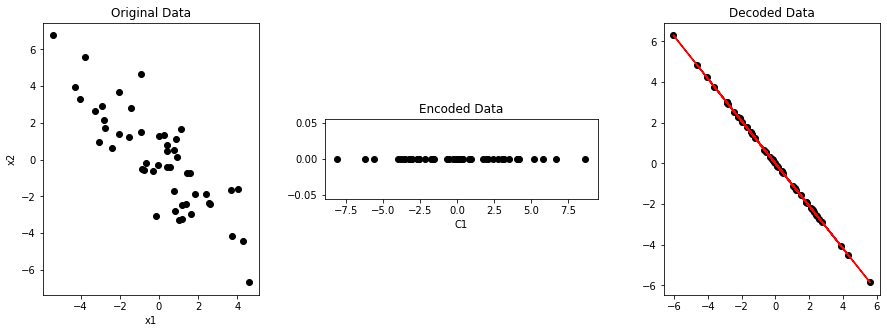

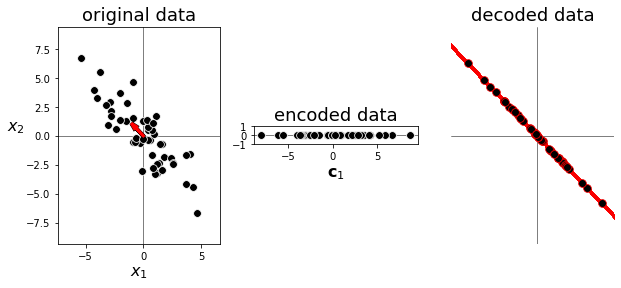

In [54]:
from mlrefined_libraries import unsupervised_library as unsuplib


x = np.loadtxt(datapath + '2d_span_data_centered.csv',delimiter=',')

g = autoencoder; alpha_choice = 10**(-4); max_its = 1000; C = 0.1*np.random.randn(2,1);
C = np.array([[-3.5],[3.5]])

encode_w_history, encode_cost_history =  gradient_descent(g,alpha_choice,max_its,C)

gs = gridspec.GridSpec(3,15)
plt.figure(figsize = (15,5))

#original
orig = plt.subplot(gs[:,0:4])
orig.scatter(x[0],x[-1],color = 'black')
plt.xlabel('x1')
plt.ylabel('x2')
orig.set_title('Original Data')

#encoded
encode = plt.subplot(gs[1,5:10])
plt.xlabel('C1')
encd_x = np.dot(encode_w_history[-1].T,x)
encd_y = np.zeros((1,np.size(x[0])))
encode.scatter(encd_x,encd_y,color = 'black')
encode.set_title('Encoded Data')

#decoded
decode = plt.subplot(gs[:,11:15])
a = model(x,encode_w_history[-1])
decode.plot(a.T[0],a.T[-1],color = 'red')
decode.scatter(a.T[0],a.T[-1], color = 'black')
decode.set_title('Decoded Data')

plt.show()

unsuplib.autoencoder_demos.show_encode_decode(x,encode_cost_history,encode_w_history,show_pc = True,scale = 150,encode_label = r'$\mathbf{c}_1$',projmap = False)



# Exercise 4

In this exercise we shall try to reproduce the results shown in Fig. 8.7 from example 8.4. We
shall use the dataset ’2d span data.csv’ along with the code on page 218-219.

## 4.1) 
Import the data set and use def center(X) to first center the data then def compute pcs(X,lam)
to compute the principal components. Finally, reproduce Fig 8.7.


In [55]:
def center(X):
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

def compute_pcs(X,lam):
    # create the correlation matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    D,V = np.linalg.eigh(Cov)
    return D,V

def pca_transform_data(x,lam,**kwargs):

    # number of principal components to keep
    # regularizer penalty paramater
    num_components = x.shape[0]
    if 'num_components' in kwargs:
        num_components = kwargs['num_components']
    if 'lam' in kwargs:
        lam = kwargs['lam']
        
    # compute principal components
    D,V = compute_pcs(x,lam)
    V = V[:,-num_components:]
    D = D[-num_components:]
    
    # compute transformed data for PC space: V^T X
    W = np.dot(V.T,x)
    
    return W,V

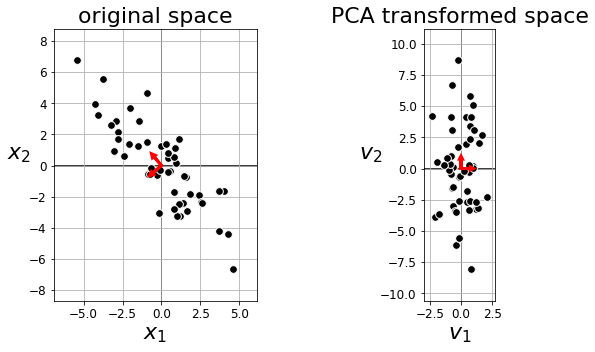

In [56]:


X_original = np.loadtxt(datapath + '2d_span_data.csv', delimiter=',')

# mean-center the data
X = center(X_original)

lam = 10**(-7)

# compute the full PCA transformation of dataset
W,V = pca_transform_data(X,lam)

# plot data in original and pca-transformed spaces -> using the github library
unsuplib.PCA_demos.pca_visualizer(X,W,V)

# Exercise 5

In this exercise you shall implement K-Means clustering directly in python. We shall use a data
set with 3 ’blobs’ of data points, ’blobs.dat’.

## 5.1)
Implement 2 functions def update assignments(data,centroids) and
def update centroids(data,old centroids,assignments) that updates the assignments of
the data points to the centroids and the position of the centroids, respectively. Then pick 3
points and initialize 3 centroids with the coordinates of the 3 points. Use the initial positions of
the centroids to perform 5 full sweeps through all the points, each time updating the assignments
and then the position of the centroids.

In [92]:
import copy

def update_assignments(data,centroids):
    #determine number of points 
    P = np.shape(data)[1]
    
    #empty list for for assignments
    assignments = []
      
    #obtain pth point form data
    for p in range(P):
        x_p = data[:, p][:, np.newaxis]
    
    
        #compute distance between pth point and centorid
        diff_cent = np.sum((x_p - centroids)**2, axis = 0)
    
        #find closest centroid to the points
        index = np.argmin(diff_cent)
        assignments.append(index)
        
    return np.array(assignments)


def update_centroids(data,old_centroids,assignments):
    #number of iterations (same as number of old centroids)
    J = np.shape(old_centroids)[1]
    
    #empty list for new centorids
    new_centroids = []
    
    for j in range(J):
        #determine Sk where xp currently assigned to jth cluster
        S_k = np.argwhere(assignments == j)
        
        c_k = 0
        
        if np.size(S_k) > 0:
            c_k = np.mean(data[:,S_k], axis = 1)
            
        else:
            c_k = copy.deepcopy(old_centroids[:, j])[:, np.newaxis]
        
        new_centroids.append(c_k)
        
    new_centroids = np.array(new_centroids)[:, :, 0]
    return new_centroids.T
         

def centroid_calc(data,centroids,max_its):
    #loop to update centroids and which centroid the points are assigned to
    for i in range(max_its):
        
        assignments = update_assignments(data,centroids)
        
        centroids = update_centroids(data,centroids,assignments)
        
    assignments = update_assignments(data,centroids)
    
    return centroids,assignments

    

[[-1.02153904  1.19439702 -0.12296075]
 [-1.23765339  0.23195501 -0.73589005]]
[-5.23196832 -2.99637348 -9.00736394] 
 [-1.04536529  7.42475134  7.17988226]


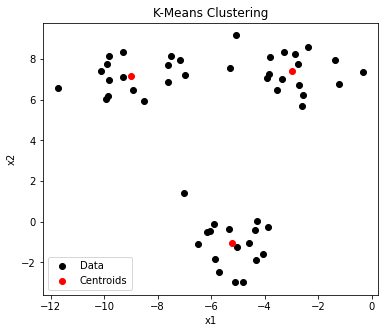

In [95]:
data = np.loadtxt('blobs.dat')

start_centroids = np.random.randn(2,3)

#print(np.shape(start_centroids))
print(start_centroids)

max_its = 5

centroids_new, new_data = centroid_calc(data,start_centroids,max_its)

#print('\n',centroids_new,'\n')
print(centroids_new[0],'\n',centroids_new[-1])
plt.figure(figsize = (6,5))
plt.scatter(data[0],data[-1],color = 'black')
plt.scatter(centroids_new[0],centroids_new[-1], color = 'red')
plt.legend(['Data','Centroids'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering')
plt.show()

#Note may need to run a few time before the centroid apear to match


## 5.2)
By varying the number of centroids K from 1 throught 10, produce a scree plot for the
data. Is there a clear indication of the correct value for K ?


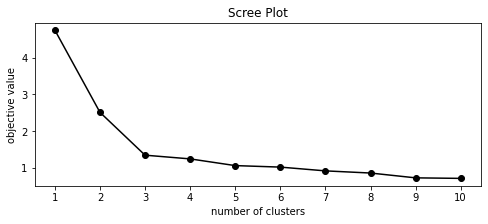

In [96]:
from mlrefined_libraries import unsupervised_library as unsuperlib

K_range = np.arange(1,11,1)

unsuperlib.K_means_demos.scree_plot(data,K_range,max_its = 10)
plt.title('Scree Plot')
plt.show()

# Exercise 6

In [97]:
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)
X=dataset[:,[1,3]]
Y=dataset[:,4]
print(X.shape)
print(Y.shape)

(1372, 5)
(1372, 2)
(1372,)


## 6.1)
Use matplotlib to make a 2D plot with the individual data points shown as symbols with
different colors for the fake and real data points. Can you visually separate the two classes by
a straight line ?


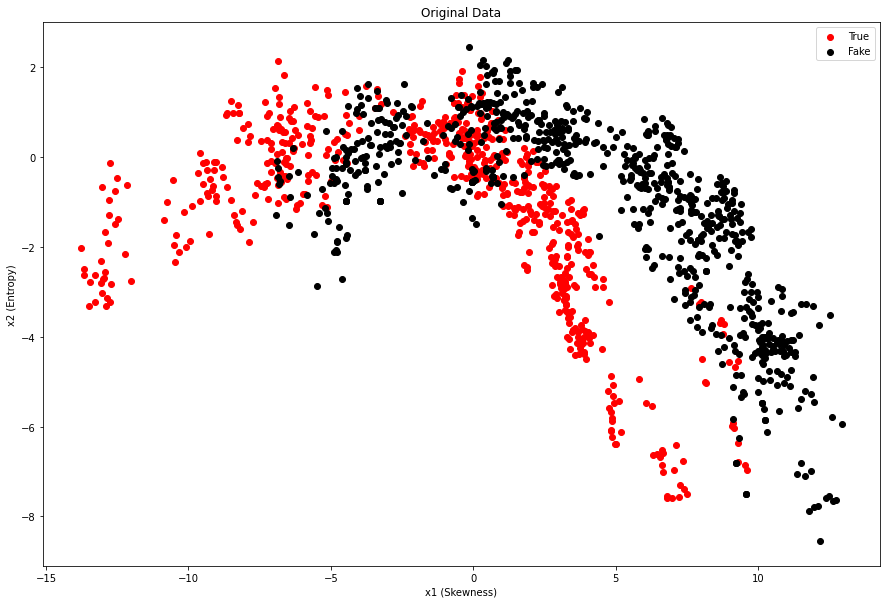

In [98]:
Y.shape = (1,1372)

index_true = np.argwhere(Y == 1)[:, 1]
index_fake = np.argwhere(Y == 0)[:, 1]

x_true = X[index_true, :]
x_fake = X[index_fake, :]

plt.figure(figsize = (15,10))
plt.scatter(x_true[:,0],x_true[:,-1], color ='red')
plt.scatter(x_fake[:,0],x_fake[:,-1], color ='black')
plt.xlabel('x1 (Skewness)')
plt.ylabel('x2 (Entropy)')
plt.title('Original Data')
plt.legend(['True','Fake'])
plt.show()


## 6.2)
Use Keras+Tensorflow to perform a logistic regression on the data using a single neuron
with sigmoid activation. This can be done using:
Dense(1, batch_input_shape=(None, 2),activation=’sigmoid’)
Note the use of batch input shape=(None, 2) the None is used later for the actual batch
size, so this means that we’re expecting a yet to be determined number of rows each with 2
columns corresponding to x1 and x2. Compile the model using stochastic gradient descent
for the optimizer with a learning rate of 0.15 and ’binary crossentropy’ for the loss. Train
the model over 400 epochs with a batchsize of 128. Use history.history[’accuracy’] and
history.history[’loss’] to plot the accuracy and loss history. You can access the history
by using history = model.fit(..). Is the logistic regression working well ?

In [99]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential([
    layers.Dense(1, batch_input_shape=(None, 2),activation='sigmoid')])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer = stochastic_GD, loss = 'binary_crossentropy', metrics = ['accuracy'])

Y_column = Y.T

history = model.fit(X, Y_column, epochs = 400, batch_size = 128)

Epoch 1/400
11/11 [==============================] - 0s 1ms/step - loss: 1.0278 - accuracy: 0.6414
Epoch 2/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.6946
Epoch 3/400
11/11 [==============================] - 0s 997us/step - loss: 0.5205 - accuracy: 0.7274
Epoch 4/400
11/11 [==============================] - 0s 997us/step - loss: 0.5158 - accuracy: 0.7289
Epoch 5/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7340
Epoch 6/400
11/11 [==============================] - 0s 997us/step - loss: 0.5137 - accuracy: 0.7347
Epoch 7/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7238
Epoch 8/400
11/11 [==============================] - 0s 997us/step - loss: 0.5142 - accuracy: 0.7150
Epoch 9/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7106
Epoch 10/400
11/11 [==============================] - 0s 997us/step - loss: 0.5171 - accuracy: 0.7143

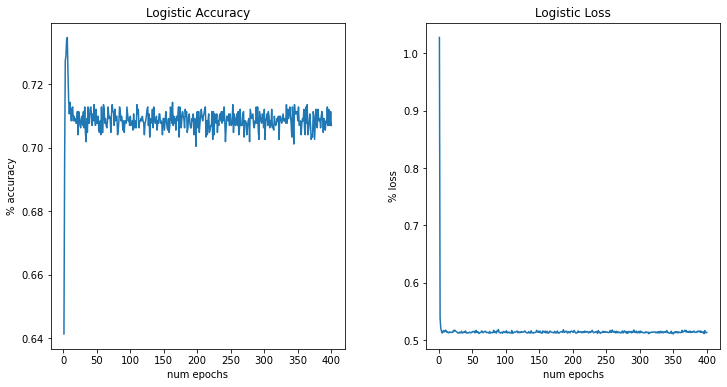

In [100]:
x_int = np.arange(1,401)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (12,6))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Logistic Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Logistic Loss')
loss.plot(x_int,history.history['loss'])

plt.show()

## 6.3)
Now we want to visualize how things are working. Create linear arrays of 50 points along
the x1 and x2 axis’ using:

x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 50)

x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 50)

This defines a grid in the 2D plane. Use model.predict to evaluate the model’s prediction on
the grid. Note, that if you want to check a single point you need to have the shape correct.
For instance you can use:

model.predict(np.reshape(np.array([0.0,0.1]),(1,2)))

You need this since the individual points are exptected to have shape (1,2) - a row-vector not
a column vector. Furthermore, since you’re using a sigmoid the model should predict numbers
between 0.0 and 1.0. Then plot the results as a contour map using the matplotlib function
plt.contourf. Then, as you did above, plot the actual data points on top of the contour map
using color coding for the fake and real data points. Comment on your observations.


(2500,)
(2500, 2)
5000
(2500, 1)


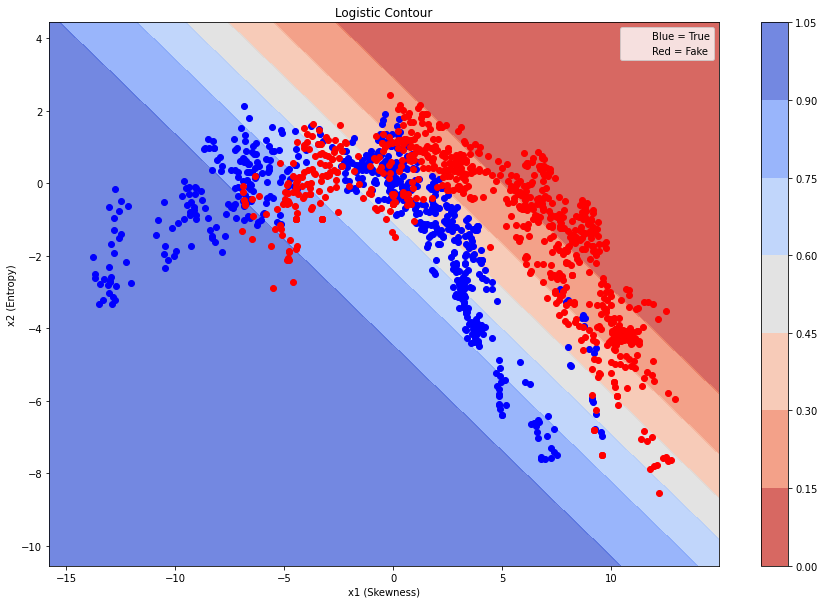

In [101]:
# Define 50 points on the x1-axis
x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 50) 

# Define 50 points on the x2-axis
x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 50) 

X_g , Y_g = np.meshgrid(x1list,x2list)

x_grid = X_g.flatten()
print(np.shape(x_grid))
x_grid.shape = (2500,1)
y_grid =Y_g.flatten()
y_grid.shape = (2500,1)

data_set = np.concatenate((x_grid,y_grid), axis = 1)

print(np.shape(data_set))
print(np.size(data_set))

data_points = model.predict(data_set)

print(np.shape(data_points))
data_points.shape = (50,50)

plt.figure(figsize = (15,10))
plt.contourf(X_g, Y_g, data_points, cmap = 'coolwarm_r', alpha = 0.8)
plt.colorbar()

plt.scatter(x_true[:,0],x_true[:,-1], color ='blue')
plt.scatter(x_fake[:,0],x_fake[:,-1], color ='red')

plt.legend(['Blue = True','Red = Fake'])
plt.title('Logistic Contour')
plt.xlabel('x1 (Skewness)')
plt.ylabel('x2 (Entropy)')

plt.show()

## 6.4)
We now want to improve on the model by building a network with a hidden layer. First
insert a dense layer of 8 neurons with sigmoid activation. Follow this layer with an output layer
of 2 neurons with softmax activation. In this case the output can be interpreted as a probabilities for fake and real. Furthemore we convert to one-hot encoding for the labels so that we
transform y=0 to (1,0) and y=1 to (0,1). This can be done using a keras utility in a simple way.

Y_c=to_categorical(Y,2)

Once this is done we can use ’categorical crossentropy’ for the loss, the same learning
rate of 0.15 along with stochastic gradient descent for compiling the model. We have to use
’categorical crossentropy’ and not ’sparse categorical crossentropy’ since we have
one-hot encoded y. Build, compile and finally fit this model using 400 epochs and a batch size
of 128. As above, plot the accuracy and loss versus the epochs. Coment on your results.


In [102]:
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)
X=dataset[:,[1,3]]
Y=dataset[:,4]
print(X.shape)
print(Y.shape)

(1372, 5)
(1372, 2)
(1372,)


In [103]:
from tensorflow.keras.utils import to_categorical 
from urllib.request import urlopen
from tensorflow.keras import models
from tensorflow.keras import layers

Y_c=to_categorical(Y,2)
Y_c.shape = (1372,2)
print(np.shape(Y_c))

model_2 = models.Sequential([
    layers.Dense(8, batch_input_shape=(None, 2),activation='sigmoid'),
    layers.Dense(2,activation='softmax')
])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model_2.compile(optimizer = stochastic_GD, loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

history2 = model_2.fit(X, Y_c, epochs = 400, batch_size = 128)


(1372, 2)
Epoch 1/400
11/11 [==============================] - 0s 907us/step - loss: 0.7765 - accuracy: 0.4964
Epoch 2/400
11/11 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.6195
Epoch 3/400
11/11 [==============================] - 0s 997us/step - loss: 0.6498 - accuracy: 0.6224
Epoch 4/400
11/11 [==============================] - 0s 998us/step - loss: 0.6377 - accuracy: 0.6297
Epoch 5/400
11/11 [==============================] - 0s 906us/step - loss: 0.6295 - accuracy: 0.6370
Epoch 6/400
11/11 [==============================] - 0s 907us/step - loss: 0.6167 - accuracy: 0.6443
Epoch 7/400
11/11 [==============================] - 0s 997us/step - loss: 0.6030 - accuracy: 0.6399
Epoch 8/400
11/11 [==============================] - 0s 997us/step - loss: 0.5873 - accuracy: 0.6283
Epoch 9/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.6356
Epoch 10/400
11/11 [==============================] - 0s 923us/step - loss: 0.5622 - 

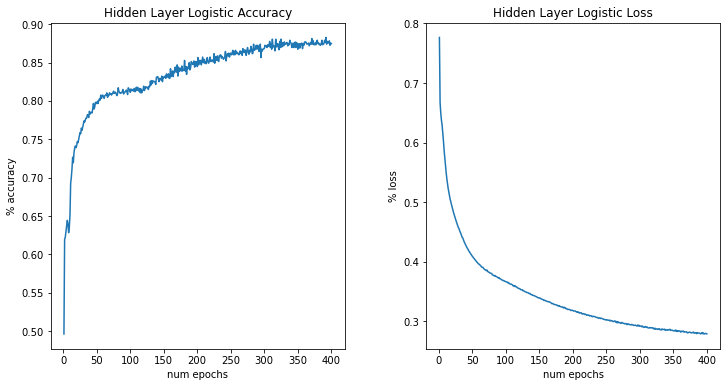

In [104]:
x_int = np.arange(1,401)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (12,6))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Hidden Layer Logistic Accuracy')
accuracy.plot(x_int,history2.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Hidden Layer Logistic Loss')
loss.plot(x_int,history2.history['loss'])

plt.show()

## 6.5)
In this case if we use model.predict we should get two numbers corresponding to probabilities for fake and real. As before, use the probability for real to make a 2D contour plot of
the predictions of the model with the actual data points super imposed. Compare your results
to what was obtained with a single neuron and comment on your observations.


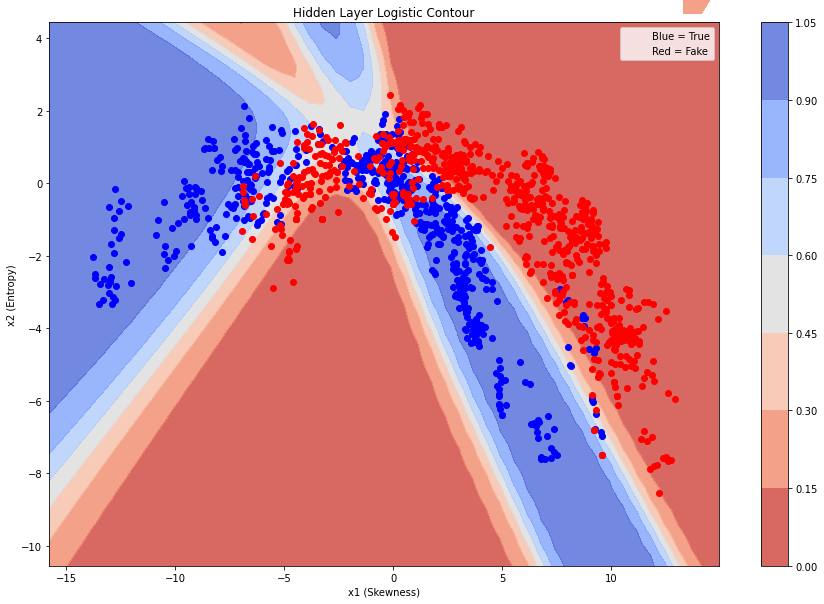

In [105]:
# Define 50 points on the x1-axis
x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 50) 

# Define 50 points on the x2-axis
x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 50) 

X_g , Y_g = np.meshgrid(x1list,x2list)

x_grid = X_g.flatten()
# print(np.shape(x_grid))
x_grid.shape = (2500,1)
y_grid =Y_g.flatten()
y_grid.shape = (2500,1)

data_set = np.concatenate((x_grid,y_grid), axis = 1)

# print(np.shape(data_set))
# print(np.size(data_set))

data_points2 = model_2.predict(data_set)[:,-1]
data_points2.shape = (2500,1)


data_points2.shape = (50,50)


plt.figure(figsize = (15,10))
plt.contourf(X_g, Y_g, data_points2, cmap = 'coolwarm_r', alpha = 0.8)
plt.colorbar()

plt.scatter(x_true[:,0],x_true[:,-1], color ='blue')
plt.scatter(x_fake[:,0],x_fake[:,-1], color ='red')

plt.title('Hidden Layer Logistic Contour')
plt.xlabel('x1 (Skewness)')
plt.ylabel('x2 (Entropy)')
plt.legend(['Blue = True','Red = Fake'])
plt.show()
